# Inspect the Dataset

In [62]:
import pandas as pd
data = pd.read_csv("C:/Users/SARANG/Desktop/DOCS/Jobs/Portfolio/Python_PeopleAnalytics_EmployeeTurnover/HR Data.csv")
data.head()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction            14999 non-null float64
evaluation              14999 non-null float64
number_of_projects      14999 non-null int64
average_montly_hours    14999 non-null int64
time_spend_company      14999 non-null int64
work_accident           14999 non-null int64
churn                   14999 non-null int64
promotion               14999 non-null int64
department              14999 non-null object
salary                  14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [64]:
(data.salary.unique())

array(['low', 'medium', 'high'], dtype=object)

# Processing category variables

In [65]:
data.salary = data.salary.astype('category')
data.salary = data.salary.cat.reorder_categories(['low','medium','high'])
data.salary = data.salary.cat.codes
data.salary.unique()

array([0, 1, 2], dtype=int64)

In [54]:
departments = pd.get_dummies(data.department)
departments.head()

,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0


In [55]:
departments = departments.drop('IT', axis = 1)
departments.head()

,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,1,0,0


In [67]:
# Getting in the correct column
data.drop('department', axis = 1, inplace = True)
data.head()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,salary
0,0.38,0.53,2,157,3,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1
2,0.11,0.88,7,272,4,0,1,0,1
3,0.72,0.87,5,223,5,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0


In [70]:
data = data.join(departments)
data.head()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,salary,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,1,0,0


# Turnover Rate

In [71]:
data.churn.value_counts(normalize = True)

0    0.761917
1    0.238083
Name: churn, dtype: float64

# Checking Correlation

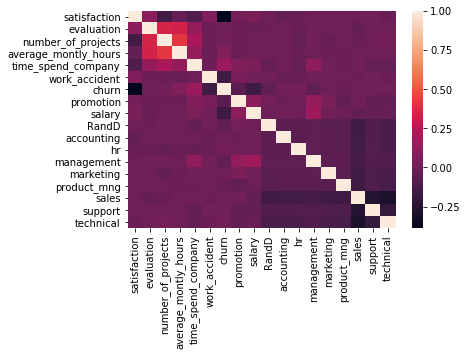

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
corr_matrix = data.corr()
sns.heatmap(corr_matrix)
plt.show()

In [85]:
# Building the model
from sklearn.model_selection import train_test_split
features = data.drop('churn', axis = 1)
target = data.churn
train_features,test_features,train_target,test_target = train_test_split(features, target, test_size = 0.25, random_state = 1)

In [86]:
features.head()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,promotion,salary,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,0,1,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,1,0,0


In [87]:
target.head()

0    1
1    1
2    1
3    1
4    1
Name: churn, dtype: int64

In [96]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state = 1)
model.fit(train_features, train_target)
model.score(train_features,train_target)
model.score(test_features, test_target)

0.9770666666666666

In [ ]:
# Train Accuracy = 100%
# Test Accuracy = 97.71%

In [92]:
tree.export_graphviz(model, out_file = 'tree.dot')

In [97]:
# Tuning the model to address outfitting
model_with_depth_5 = DecisionTreeClassifier(max_depth=5, random_state=1)
model_with_depth_5.fit(train_features,train_target)
model_with_depth_5.score(test_features,test_target)

model_with_leafsize_100 = DecisionTreeClassifier(min_samples_leaf=100, random_state=1)
model_with_leafsize_100.fit(train_features,train_target)
model_with_leafsize_100.score(test_features,test_target)



0.9610666666666666

In [ ]:
# Test accuracy _depth_5 = 97.38%
# Test accuracy _leafsize_100 = 96.10%

In [ ]:
# Tuning the model to address outfitting
# Train Accuracy = 100%
# Test Accuracy = 97.71%
# Test accuracy _depth_5 = 97.38%
# Test accuracy _leafsize_100 = 96.10%

In [98]:
# ROC_AUC_Curve for visualizing Recall(leavers) & (1-specificity)(Stayers)
from sklearn.metrics import roc_auc_score
prediction = model.predict(test_features)
roc_auc_score(test_target, prediction)

0.9742276803036644

In [100]:
# Addressing Class imbalance
model_5_balanced = DecisionTreeClassifier(max_depth=5, class_weight='balanced', random_state= 1)
model_5_balanced.fit(train_features,train_target)
pred = model_5_balanced.predict(test_features)

In [103]:
roc_auc_score(test_target, pred)

0.9455053473020829

In [106]:
# Using GridSearch
from sklearn.model_selection import GridSearchCV
depth = [i for i in range(5,21,1)]
leafsize = [i for i in range(100,550,50)]
parameters = dict(max_depth=depth, min_samples_leaf = leafsize)
grid = GridSearchCV(model, parameters)
grid.fit(train_features,train_target)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], 'min_samples_leaf': [100, 150, 200, 250, 300, 350, 400, 450, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [107]:
grid.best_params_

{'max_depth': 5, 'min_samples_leaf': 100}

In [113]:
feature_importances = model.feature_importances_

In [114]:
features_list = list(features)
features_list

['satisfaction',
 'evaluation',
 'number_of_projects',
 'average_montly_hours',
 'time_spend_company',
 'work_accident',
 'promotion',
 'salary',
 'RandD',
 'accounting',
 'hr',
 'management',
 'marketing',
 'product_mng',
 'sales',
 'support',
 'technical']

In [116]:
relative_importances = pd.DataFrame(index=features_list, data=feature_importances, columns= ['importance'])
relative_importances.sort_values(by=['importance'], ascending=False)

,importance
satisfaction,0.504046
evaluation,0.146693
time_spend_company,0.131307
number_of_projects,0.107566
average_montly_hours,0.089486
technical,0.004650
salary,0.004388
sales,0.003323
support,0.002022
work_accident,0.001984
